## Grouping data
This Notebook replicates training\08-groupby.ipynb with  my personal notes from 

### 8.1 Aggregate() or Agg() and multi-dimensional calculation
A mathematical aggregation consolidates data according to a particular calculation. NumPy, and therefore Pandas object, have a number of aggregations already built-in.
count(), mean(), median(), sum(), etc are some examples. However, when it comes to multi-dimensional calculation, the typical stuff stored on a dataframe, the immediate way is to put it into a for-loop, iterate through the items and then create a separate object with the consolidated result.

The pandas aggregation methods will allow an enormous simplification of the code, as there will be no need to iterate via for-loops.

#### Groupby() - Why?
Say for instance I want to find the average lifeExp by year for the dataset below

In [3]:
import pandas as pd
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


one way to achieve this is to run a loop and calculate the average individually for each year as per below

In [4]:
df2 = pd.DataFrame()
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    print(year, year_data['lifeExp'].mean()) # or  df2 = df2.append({'year': year, 'lifeExp': year_data['lifeExp'].mean()}, ignore_index=True)


1952 49.057619718309866
1957 51.50740112676056
1962 53.609249014084504
1967 55.678289577464795
1972 57.64738647887324
1977 59.57015746478874
1982 61.53319718309859
1987 63.21261267605633
1992 64.16033802816901
1997 65.01467605633802
2002 65.69492253521126
2007 67.00742253521126


The code above is slow because it uses for-loops, creates a new object, is 4 lines in size and requires a bit of attention to understand what's going on.
Instead, this could be simplified to a single line as per below. It's cleaner and faster and allows for easy visualisation with things like plot. 

<AxesSubplot: xlabel='year'>

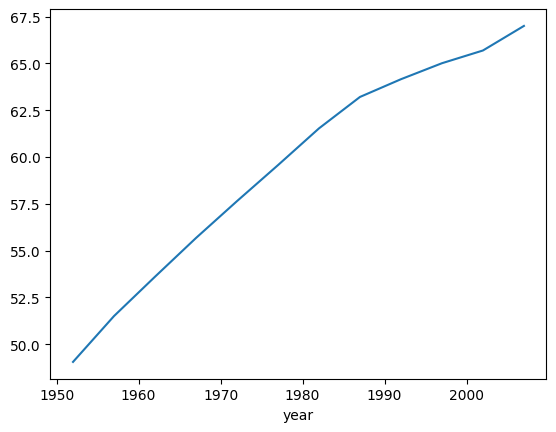

In [5]:
df2 = df.groupby('year')['lifeExp'].mean()
df.groupby('year')['lifeExp'].mean().plot()

### Groupby() - Methods and functions 
[Table 8.1](https://learning.oreilly.com/library/view/pandas-for-everyone/9780137891146/ch08.xhtml#ch08tab01) in the book has a full list of methods. The usual suspects are there: count(), mean(), etc. More methods from pandas and numpy can be used, but that table will suffice most cases.

groupby().describe() is actually pretty cool and gives us a glimpse of a multi-dimensional data in a single line

In [6]:
df.groupby('year')['lifeExp'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


### .aggregate() or .agg() - Custom user function
Sometimes we may want to perform a calculation that is not provided by Pandas or another library. We can write our own function that performs the calculation we want and use it in .agg() as well.

In the following example, we will calculate the global average life expectancy, diff_value, and subtract it from each grouped value.

<AxesSubplot: xlabel='year'>

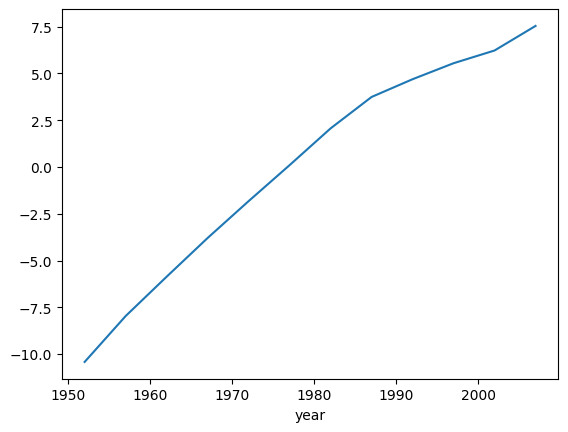

In [7]:
# Difference between the mean and diff_value
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return(mean - diff_value)

global_mean = df["lifeExp"].mean()

agg_mean_diff = (
  df.groupby("year")["lifeExp"]
    .agg(my_mean_diff, diff_value=global_mean)
)

agg_mean_diff.plot()

In [8]:
# We can also do several calculations over a single .agg() passing a list of functions
import numpy as np
gdf = (
  df.groupby("year")["lifeExp"]
    .agg(   [np.count_nonzero, np.mean, np.std]  )   # list of functions
)
gdf

,count_nonzero,mean,std
year,,,
1952,142,49.057620,12.225956
1957,142,51.507401,12.231286
1962,142,53.609249,12.097245
1967,142,55.678290,11.718858
1972,142,57.647386,11.381953
1977,142,59.570157,11.227229
1982,142,61.533197,10.770618
1987,142,63.212613,10.556285
1992,142,64.160338,11.227380


In [9]:
# Or different calculations for different columns
gdf = (
    df.groupby("year")
    .agg(
        {
            "lifeExp": "mean",      # np.mean by default
            "pop": "median",        # np.median by default
            "gdpPercap": np.std,    # np.std splicitly defined (could be a custom function too or a lambda)
        }
    )
).rename(columns={"lifeExp": "mean_lifeExp", "pop": "median_pop", "gdpPercap": "std_gdpPercap"}) # rename columns to something more meaningful
gdf

,mean_lifeExp,median_pop,std_gdpPercap
year,,,
1952,49.057620,3943953.0,9321.064786
1957,51.507401,4282942.0,9869.662202
1962,53.609249,4686039.5,8667.362525
1967,55.678290,5170175.5,8095.315431
1972,57.647386,5877996.5,10614.383403
1977,59.570157,6404036.5,8362.489150
1982,61.533197,7007320.0,7733.845006
1987,63.212613,7774861.5,8288.281304
1992,64.160338,8688686.5,9031.846080


## 8.2 Transform

.transform() takes multiple values and returns a one-to-one transformation of the values. That is, unlike .agg(), which takes multiple values and returns a single (aggregated) values, .transform() does not reduce the length of data.

One of the simplest examples is creating a z-score normalization. Note the size of the series after the normalization is the same size of the df.column (i.e. non-normalised series) 

In [10]:
# the function below is equivalent to zscore
# from scipy.stats import zscore
def my_zscore(x):
  return((x - x.mean()) / x.std())

transform_z = df.groupby('year')["lifeExp"].transform(my_zscore)
print('Dataframe shape:', df.shape)
print('Transformed z-score shape:', transform_z.shape)
transform_z.head()


Dataframe shape: (1704, 6)
Transformed z-score shape: (1704,)


0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

### NB: .transform() vs .apply()

- transform() can take a function, a string function, a list of functions, and a dict. However, apply() is only allowed a function.
- transform() cannot produce aggregated results
- apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

for more on this see the article [When to use Pandas transform() function](https://towardsdatascience.com/when-to-use-pandas-transform-function-df8861aa0dcf), which complements very well this topic from the book. The example below shows the difference.


In [20]:
# take a slice for a single year for all countries and calculate the population percentage of each country in the continent
df_1952 = df[df['year'] == 1952]
df_1952 = df_1952.copy()

# Using .merge() to get the total population of each continent
df_continent_pop = ( 
    df_1952
    .groupby('continent')['pop']
    .sum()
    .rename('continent_total_pop').reset_index()
)
df_1952_new = df_1952.merge(df_continent_pop, on='continent')
df_1952_new.loc[:,'pop_pct']=df_1952_new['pop']/df_1952_new['continent_total_pop']
                                                            
# Using .transform() to get the total population of each continent uses only 2 lines of code and is more efficient
df_1952.loc[:,'continent_total_pop']=df_1952.groupby('continent')['pop'].transform('sum')
df_1952.loc[:,'pop_pct']=df_1952['pop']/df_1952['continent_total_pop']

# display the results
df_1952[df_1952['continent'] == 'Oceania']

,country,continent,year,lifeExp,pop,gdpPercap,continent_total_pop,pop_pct
60,Australia,Oceania,1952,69.12,8691212,10039.59564,10686006,0.813327
1092,New Zealand,Oceania,1952,69.39,1994794,10556.57566,10686006,0.186673


### Missing values - more control than .fillna()

Using .fillna() .interpolate() allows us to fill Nan values, but does the same calculation for all values, regardless of grouping. With .tranform() we can specify calculations at the group level.

Say for instance there were some missing population values on different countries. It wouldn't make sense to use the population mean() for the whole dataset, instead we would want to calculate the mean() at the country level 

In [36]:
# take a slice for Oceanian countries between 1950 and 1970 and introduce some missing values
df_oceania = df.query('continent == "Oceania" and year > 1950 and year < 1970')
df_oceania = df_oceania.copy()
np.random.seed(2)
df_oceania.loc[np.random.permutation(df_oceania.index)[:4] , 'pop'] = np.nan

df_oceania


,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.12,8691212.0,10039.59564
61,Australia,Oceania,1957,70.33,NaN,10949.64959
62,Australia,Oceania,1962,70.93,NaN,12217.22686
63,Australia,Oceania,1967,71.10,11872264.0,14526.12465
1092,New Zealand,Oceania,1952,69.39,NaN,10556.57566
1093,New Zealand,Oceania,1957,70.26,2229407.0,12247.39532
1094,New Zealand,Oceania,1962,71.24,NaN,13175.67800
1095,New Zealand,Oceania,1967,71.52,2728150.0,14463.91893


In [28]:
# define the function to fill the missing values and use .transform() to fill the missing values
def fill_values(series):
    return series.fillna(series.mean())

# use .transform() to fill the missing values
df_oceania.loc[:,'pop'] = df_oceania.groupby('country')['pop'].transform(fill_values)
df_oceania

,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.12,8691212.0,10039.59564
61,Australia,Oceania,1957,70.33,9743090.0,10949.64959
62,Australia,Oceania,1962,70.93,10794968.0,12217.22686
63,Australia,Oceania,1967,71.10,9743090.0,14526.12465
1092,New Zealand,Oceania,1952,69.39,1994794.0,10556.57566
1093,New Zealand,Oceania,1957,70.26,2229407.0,12247.39532
1094,New Zealand,Oceania,1962,71.24,2112100.5,13175.67800
1095,New Zealand,Oceania,1967,71.52,2112100.5,14463.91893
